In [44]:
import numpy as np
import matplotlib.pyplot as plt
from optical_flows import lucas_kanade, horn_schunck
import ex1_utils as utils
import cv2


### base on rotated random noise

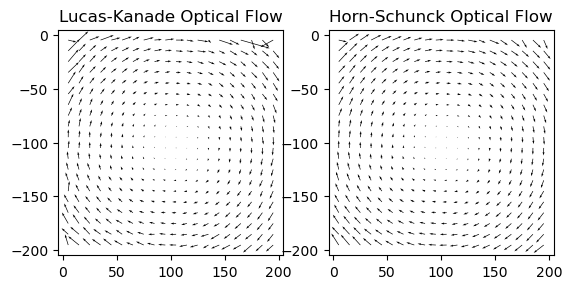

In [2]:
im1 = np.random.rand( 200, 200 ).astype(np.float32 )

im2 = im1.copy()
im2 = utils.rotate_image( im2, -1)

U_lk , V_lk = lucas_kanade( im1 , im2 , 3)
U_hs , V_hs = horn_schunck(im1 , im2 , 1000 , 0.5 )



fig1 , (ax1, ax2 ) = plt.subplots( 1 , 2 )
ax1.set_aspect('equal')
ax2.set_aspect('equal')
utils.show_flow( U_lk , V_lk , ax1 , type='field' )

ax1.set_title('Lucas-Kanade Optical Flow' )

utils.show_flow( U_hs,  V_hs , ax2 , type='field' )
ax2.set_title('Horn-Schunck Optical Flow' )

plt.savefig('report/figures/LK_HS_noise.pdf', bbox_inches='tight' )

/home/aljaz/FAKS/nmrv/project01/optical_flows.py:32: RuntimeWarning: invalid value encountered in divide
  U = -(Dy2_sum * DxDT_sum - DxDy_sum * DyDT_sum) / D
/home/aljaz/FAKS/nmrv/project01/optical_flows.py:33: RuntimeWarning: invalid value encountered in divide
  V = -(Dx2_sum * DyDT_sum - DxDy_sum * DxDT_sum) / D


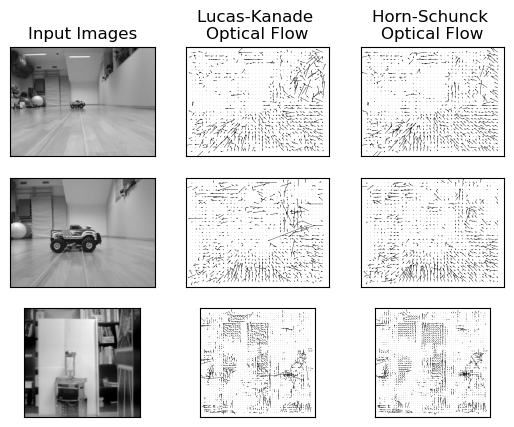

In [4]:
im1_c = cv2.imread('collision/00000001.jpg', cv2.IMREAD_GRAYSCALE)
im2_c = cv2.imread('collision/00000002.jpg', cv2.IMREAD_GRAYSCALE)

U_lk_1 , V_lk_1 = lucas_kanade( im1_c , im2_c , 3)
U_hs_1 , V_hs_1 = horn_schunck(im1_c , im2_c , 1000 , 0.5 )

im3_c = cv2.imread('collision/00000140.jpg', cv2.IMREAD_GRAYSCALE)
im4_c = cv2.imread('collision/00000141.jpg', cv2.IMREAD_GRAYSCALE)

U_lk_2 , V_lk_2 = lucas_kanade( im3_c , im4_c , 3)
U_hs_2 , V_hs_2 = horn_schunck(im3_c , im4_c , 1000 , 0.5 )

im5_lab = cv2.imread('lab2/092.jpg', cv2.IMREAD_GRAYSCALE)
im6_lab = cv2.imread('lab2/093.jpg', cv2.IMREAD_GRAYSCALE)

U_lk_3 , V_lk_3 = lucas_kanade( im5_lab , im6_lab , 3)
U_hs_3 , V_hs_3 = horn_schunck(im5_lab , im6_lab , 1000 , 0.5 )

fig, ax = plt.subplots(3, 3)

for a in ax:
    for b in a:
        b.set_aspect('equal')
        b.set_xticks([])
        b.set_yticks([])

ax[0, 0].set_title('Input Images')
ax[0, 1].set_title('Lucas-Kanade \nOptical Flow' )
ax[0, 2].set_title('Horn-Schunck \nOptical Flow')

ax[0, 0].imshow(im1_c, cmap='gray')
ax[1, 0].imshow(im3_c, cmap='gray')
ax[2, 0].imshow(im5_lab, cmap='gray')

utils.show_flow( U_lk_1 , V_lk_1 , ax[0, 1] , type='field' )
utils.show_flow( U_hs_1,  V_hs_1 , ax[0, 2] , type='field' )

utils.show_flow( U_lk_2 , V_lk_2 , ax[1, 1] , type='field' )
utils.show_flow( U_hs_2,  V_hs_2 , ax[1, 2] , type='field' )

utils.show_flow( U_lk_3 , V_lk_3 , ax[2, 1] , type='field' )
utils.show_flow( U_hs_3,  V_hs_3 , ax[2, 2] , type='field' )

plt.savefig('report/figures/LK_HS_real.pdf', bbox_inches='tight' )

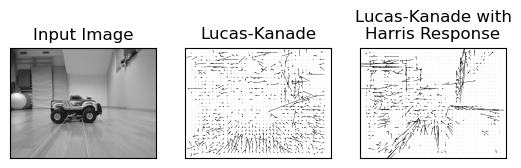

In [8]:
im1_c = cv2.imread('collision/00000140.jpg', cv2.IMREAD_GRAYSCALE)
im2_c = cv2.imread('collision/00000141.jpg', cv2.IMREAD_GRAYSCALE)

U_lk , V_lk = lucas_kanade( im1_c , im2_c , 3)
U_lk_harris , V_lk_harris = lucas_kanade( im1_c, im2_c, 3, harris=True)

fig, ax = plt.subplots(1, 3)

for a in ax:
    a.set_aspect('equal')
    a.set_xticks([])
    a.set_yticks([])

ax[0].set_title('Input Image')
ax[1].set_title('Lucas-Kanade')
ax[2].set_title('Lucas-Kanade with\nHarris Response')

ax[0].imshow(im1_c, cmap='gray')
utils.show_flow( U_lk , V_lk , ax[1] , type='field' )
utils.show_flow( U_lk_harris , V_lk_harris , ax[2] , type='field' )

plt.savefig('report/figures/LK_Harris.pdf', bbox_inches='tight' )

/home/aljaz/FAKS/nmrv/project01/optical_flows.py:32: RuntimeWarning: divide by zero encountered in divide
  U = -(Dy2_sum * DxDT_sum - DxDy_sum * DyDT_sum) / D
/home/aljaz/FAKS/nmrv/project01/optical_flows.py:32: RuntimeWarning: invalid value encountered in divide
  U = -(Dy2_sum * DxDT_sum - DxDy_sum * DyDT_sum) / D
/home/aljaz/FAKS/nmrv/project01/optical_flows.py:33: RuntimeWarning: divide by zero encountered in divide
  V = -(Dx2_sum * DyDT_sum - DxDy_sum * DxDT_sum) / D
/home/aljaz/FAKS/nmrv/project01/optical_flows.py:33: RuntimeWarning: invalid value encountered in divide
  V = -(Dx2_sum * DyDT_sum - DxDy_sum * DxDT_sum) / D


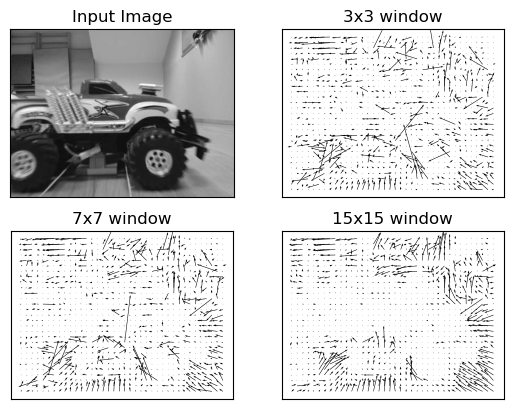

In [15]:
# im1 = cv2.imread('lab2/069.jpg', cv2.IMREAD_GRAYSCALE)
# im2 = cv2.imread('lab2/070.jpg', cv2.IMREAD_GRAYSCALE)

im1 = cv2.imread('collision/00000174.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('collision/00000175.jpg', cv2.IMREAD_GRAYSCALE)

U_lk , V_lk = lucas_kanade( im1 , im2 , 3)
U_lk_5 , V_lk_5 = lucas_kanade( im1 , im2 , 7)
U_lk_7 , V_lk_7 = lucas_kanade( im1 , im2 , 15)

fig, ax = plt.subplots(2, 2)

for a in ax:
    for b in a:
        b.set_aspect('equal')
        b.set_xticks([])
        b.set_yticks([])

ax[0, 0].set_title('Input Image')
ax[0, 1].set_title('3x3 window' )
ax[1, 0].set_title('7x7 window' )
ax[1, 1].set_title('15x15 window' )

ax[0, 0].imshow(im1, cmap='gray')
utils.show_flow( U_lk , V_lk , ax[0, 1] , type='field' )
utils.show_flow( U_lk_5 , V_lk_5 , ax[1, 0] , type='field' )
utils.show_flow( U_lk_7 , V_lk_7 , ax[1, 1] , type='field' )

plt.savefig('report/figures/LK_window.pdf', bbox_inches='tight' )

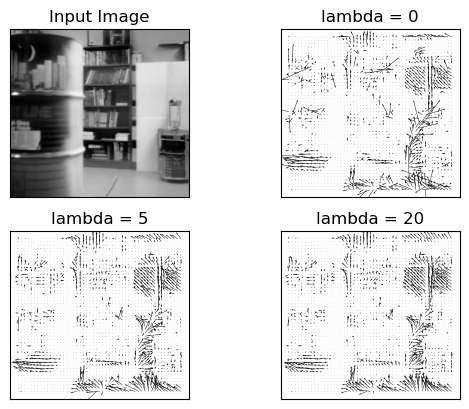

In [52]:
im1 = cv2.imread('lab2/056.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('lab2/057.jpg', cv2.IMREAD_GRAYSCALE)

# im1 = cv2.imread('collision/00000174.jpg', cv2.IMREAD_GRAYSCALE)
# im2 = cv2.imread('collision/00000175.jpg', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(2,2)

for a in ax:
    for b in a:
        b.set_aspect('equal')
        b.set_xticks([])
        b.set_yticks([])

ax[0, 0].set_title('Input Image')
ax[0, 1].set_title('lambda = 0' )
ax[1, 0].set_title('lambda = 5' )
ax[1, 1].set_title('lambda = 20' )

ax[0, 0].imshow(im1, cmap='gray')
U_hs , V_hs = horn_schunck(im1 , im2 , 100, 0 )
utils.show_flow( U_hs , V_hs , ax[0, 1] , type='field' )
U_hs , V_hs = horn_schunck(im1 , im2 , 100 , 5)
utils.show_flow( U_hs , V_hs , ax[1, 0] , type='field' )
U_hs , V_hs = horn_schunck(im1 , im2 , 100 , 20 )
utils.show_flow( U_hs , V_hs , ax[1, 1] , type='field' )


plt.savefig('report/figures/HS_lambda.pdf', bbox_inches='tight' )


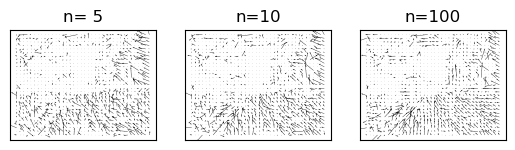

In [53]:
# im1 = cv2.imread('lab2/056.jpg', cv2.IMREAD_GRAYSCALE)
# im2 = cv2.imread('lab2/057.jpg', cv2.IMREAD_GRAYSCALE)

im1 = cv2.imread('collision/00000001.jpg', cv2.IMREAD_GRAYSCALE)
im2 = cv2.imread('collision/00000002.jpg', cv2.IMREAD_GRAYSCALE)

fig, ax = plt.subplots(1,3)

for a in ax:
    a.set_aspect('equal')
    a.set_xticks([])
    a.set_yticks([])

ax[0].set_title('n= 5')
ax[1].set_title('n=10' )
ax[2].set_title('n=100' )

U_hs , V_hs = horn_schunck(im1 , im2 , 1, 1 )
utils.show_flow( U_hs , V_hs , ax[0] , type='field' )
U_hs , V_hs = horn_schunck(im1 , im2 , 10 , 1)
utils.show_flow( U_hs , V_hs , ax[ 1] , type='field' )
U_hs , V_hs = horn_schunck(im1 , im2 , 100 , 1)
utils.show_flow( U_hs , V_hs , ax[ 2] , type='field' )


plt.savefig('report/figures/HS_iter.pdf', bbox_inches='tight' )